In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load data
df = pd.read_excel("C:/ansh/dataset/Supermart_Sales_Data_2_Years.xlsx")

# Preprocessing
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["MonthName"] = df["Date"].dt.strftime("%b")
df["Quarter"] = df["Date"].dt.quarter
df["Profit"] = df["Total Price"] * 0.3  

print("Data loaded and preprocessed successfully!")
df.head()


Data loaded and preprocessed successfully!


,Order ID,Date,Product Name,Category,Quantity,Unit Price,Total Price,Store Location,Customer Name,Year,Month,MonthName,Quarter,Profit
0,1000,2024-12-16,Colgate Toothpaste,Personal Care,6,90,540,Kolkata,Suresh Iyer,2024,12,Dec,4,162.0
1,1001,2023-08-28,Aashirvaad Atta 10kg,Grocery,10,450,4500,Mumbai,Rahul Verma,2023,8,Aug,3,1350.0
2,1002,2024-03-20,Amul Butter 500g,Dairy,9,230,2070,Kolkata,Rahul Verma,2024,3,Mar,1,621.0
3,1003,2024-02-04,Amul Butter 500g,Dairy,6,230,1380,Hyderabad,Neha Jain,2024,2,Feb,1,414.0
4,1004,2023-12-02,Dove Soap,Personal Care,4,60,240,Kolkata,Anjali Singh,2023,12,Dec,4,72.0


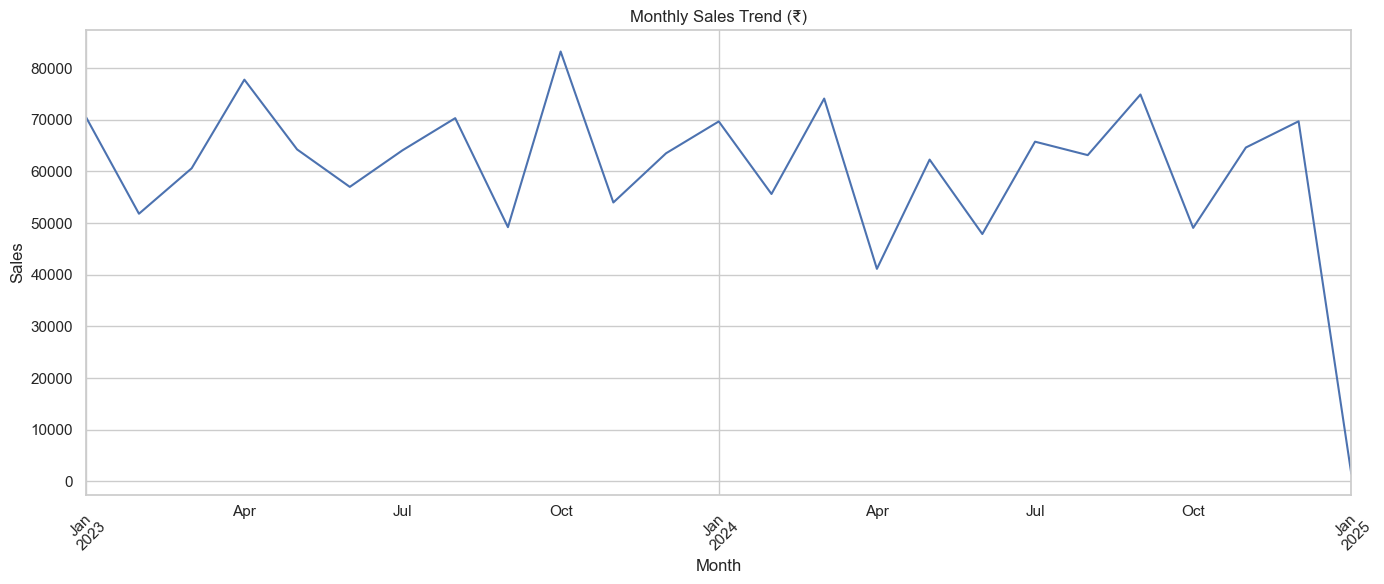

In [3]:
plt.figure(figsize=(14,6))
monthly_sales = df.groupby(pd.Grouper(key='Date', freq='ME'))['Total Price'].sum()
monthly_sales.plot()
plt.title("Monthly Sales Trend (₹)")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


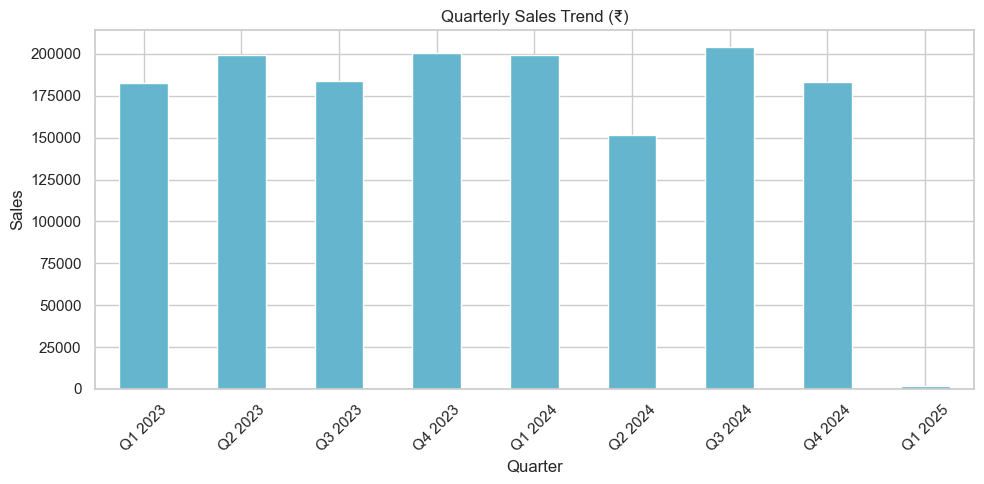

In [4]:
plt.figure(figsize=(10,5))
quarterly_sales = df.groupby(['Year', 'Quarter'])['Total Price'].sum()
quarterly_sales.index = quarterly_sales.index.map(lambda x: f"Q{x[1]} {x[0]}")
quarterly_sales.plot(kind='bar', color='c')
plt.title("Quarterly Sales Trend (₹)")
plt.ylabel("Sales")
plt.xlabel("Quarter")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


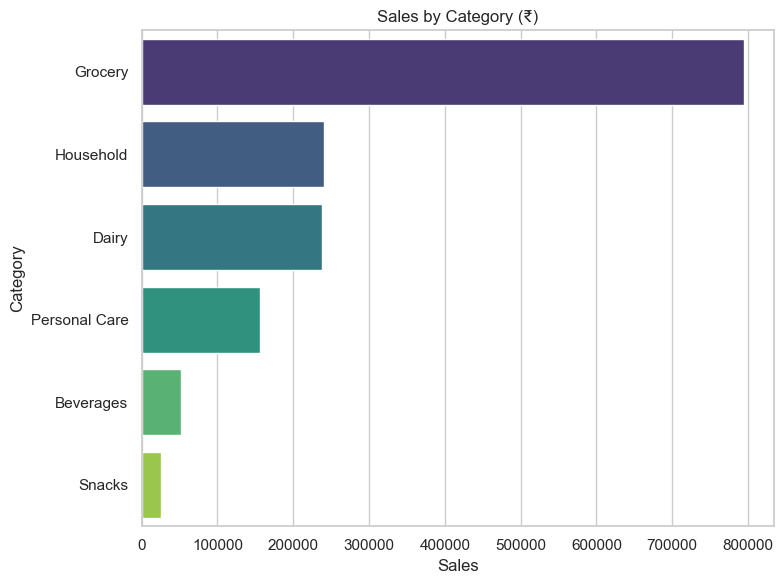

In [6]:
plt.figure(figsize=(8,6))
category_sales = df.groupby('Category')['Total Price'].sum().sort_values(ascending=False)

sns.barplot(
    x=category_sales.values,
    y=category_sales.index,
    palette="viridis",
    hue=category_sales.index,
    dodge=False,
    legend=False
)

plt.title("Sales by Category (₹)")
plt.xlabel("Sales")
plt.ylabel("Category")
plt.tight_layout()
plt.show()



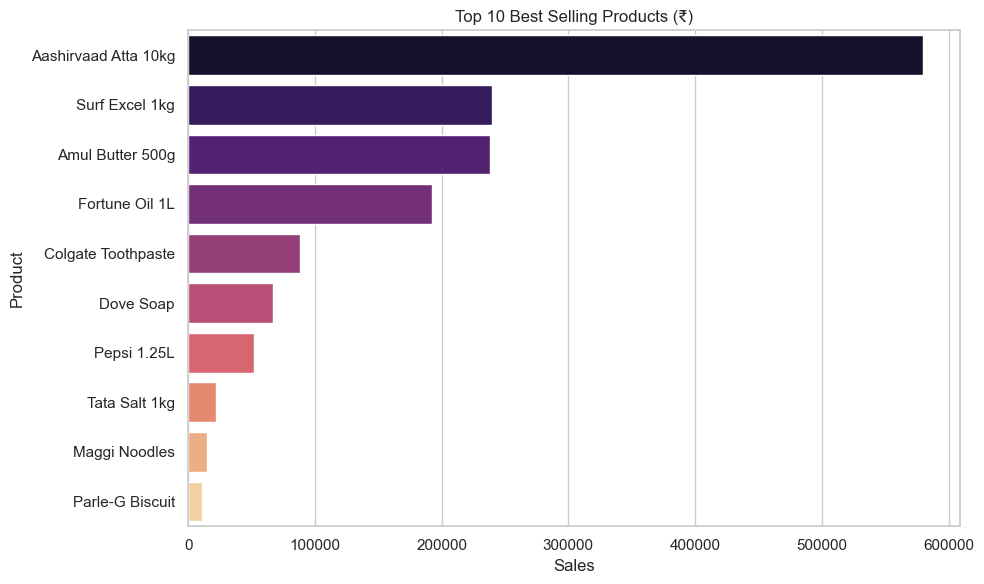

In [7]:
plt.figure(figsize=(10,6))
top_products = df.groupby('Product Name')['Total Price'].sum().sort_values(ascending=False).head(10)

sns.barplot(
    x=top_products.values,
    y=top_products.index,
    palette=sns.color_palette("magma", len(top_products)),
    hue=top_products.index,
    dodge=False,
    legend=False
)

plt.title("Top 10 Best Selling Products (₹)")
plt.xlabel("Sales")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


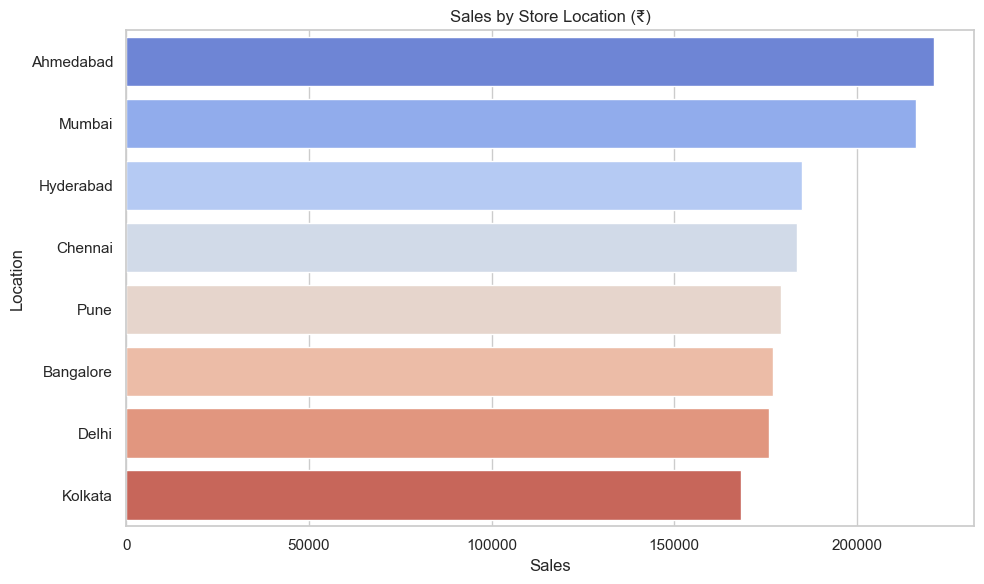

In [8]:
plt.figure(figsize=(10,6))
location_sales = df.groupby('Store Location')['Total Price'].sum().sort_values(ascending=False)

sns.barplot(
    x=location_sales.values,
    y=location_sales.index,
    palette=sns.color_palette("coolwarm", len(location_sales)),
    hue=location_sales.index,
    dodge=False,
    legend=False
)

plt.title("Sales by Store Location (₹)")
plt.xlabel("Sales")
plt.ylabel("Location")
plt.tight_layout()
plt.show()


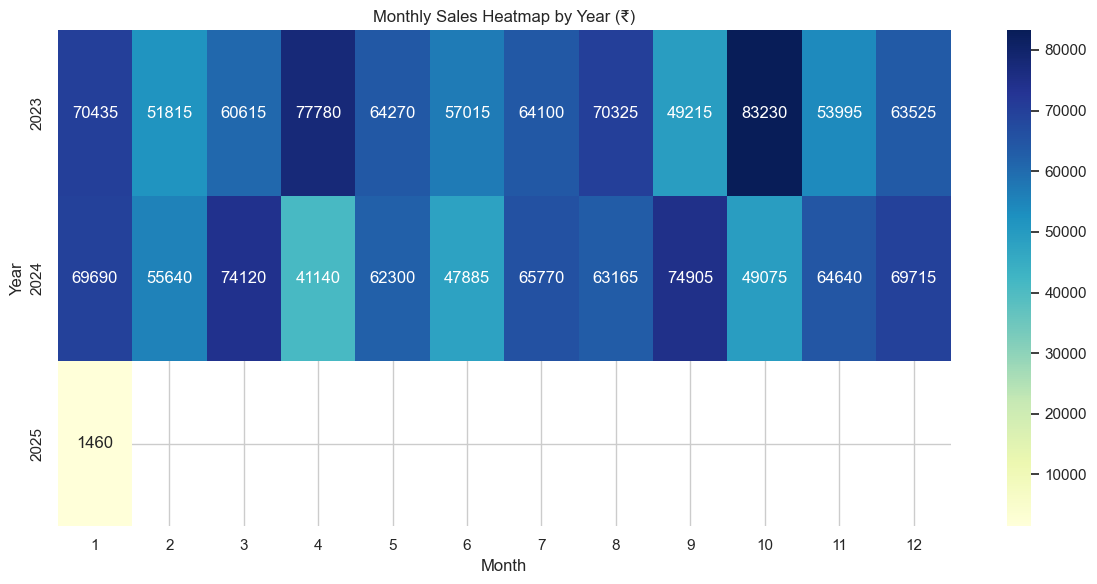

In [9]:
monthly_yearly = df.groupby(['Year', 'Month'])['Total Price'].sum().unstack()
plt.figure(figsize=(12,6))
sns.heatmap(monthly_yearly, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Monthly Sales Heatmap by Year (₹)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.tight_layout()
plt.show()


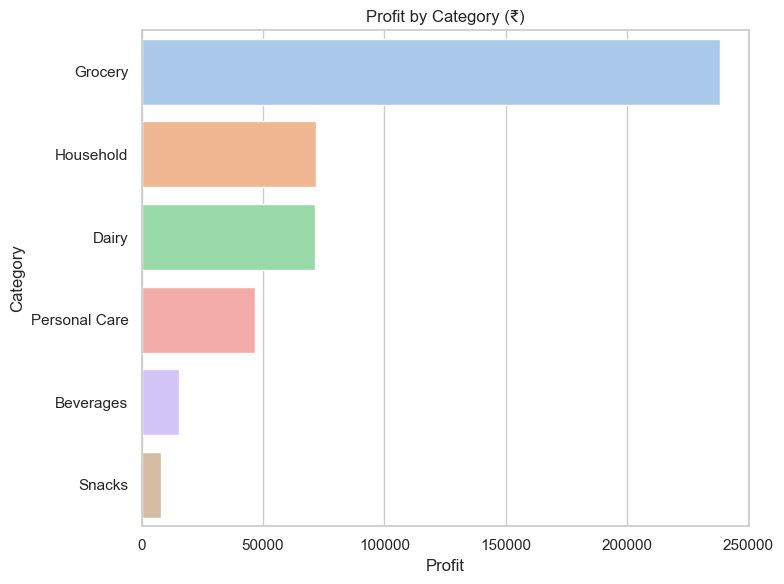

In [10]:
plt.figure(figsize=(8,6))
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)

sns.barplot(
    x=category_profit.values,
    y=category_profit.index,
    palette=sns.color_palette("pastel", len(category_profit)),
    hue=category_profit.index,
    dodge=False,
    legend=False
)

plt.title("Profit by Category (₹)")
plt.xlabel("Profit")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


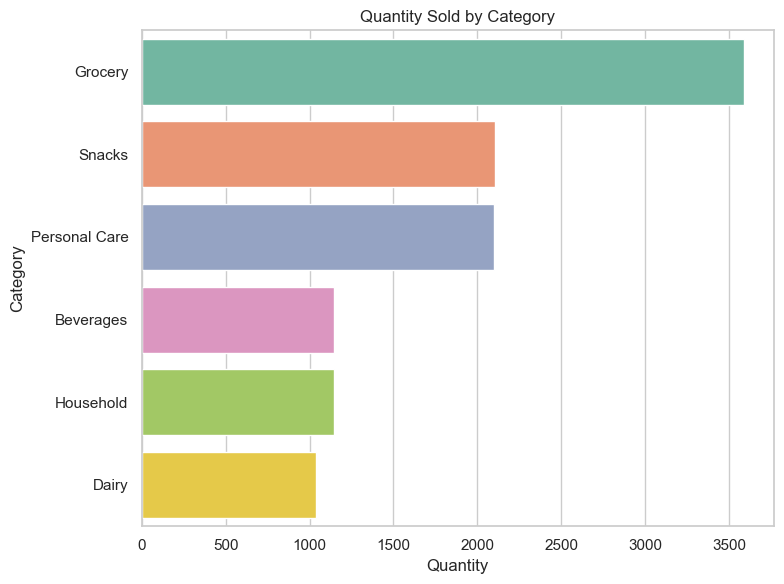

In [11]:
plt.figure(figsize=(8,6))
category_quantity = df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

sns.barplot(
    x=category_quantity.values,
    y=category_quantity.index,
    palette=sns.color_palette("Set2", len(category_quantity)),
    hue=category_quantity.index,
    dodge=False,
    legend=False
)

plt.title("Quantity Sold by Category")
plt.xlabel("Quantity")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


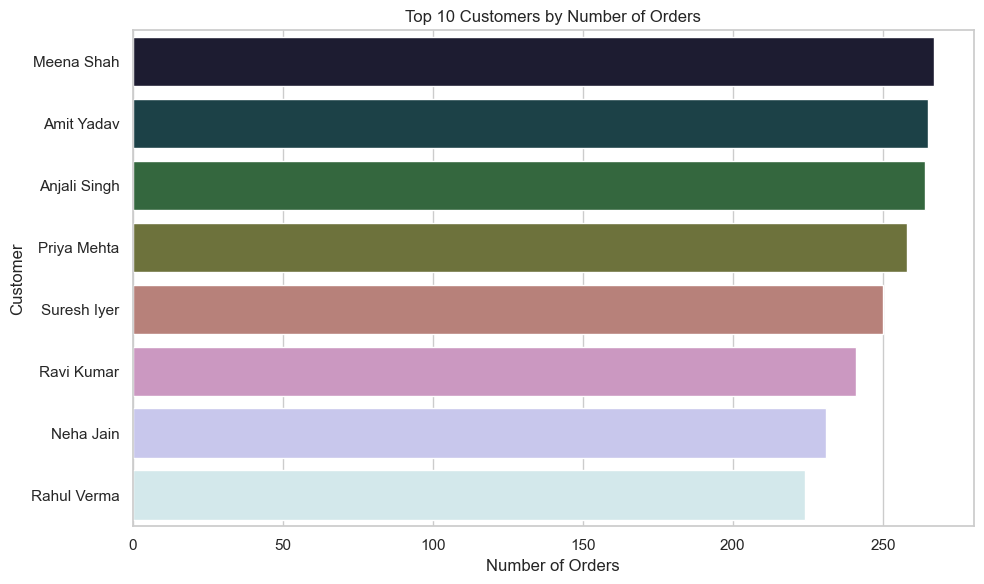

In [12]:
plt.figure(figsize=(10,6))
top_customers = df['Customer Name'].value_counts().head(10)

sns.barplot(
    x=top_customers.values,
    y=top_customers.index,
    palette=sns.color_palette("cubehelix", len(top_customers)),
    hue=top_customers.index,
    dodge=False,
    legend=False
)

plt.title("Top 10 Customers by Number of Orders")
plt.xlabel("Number of Orders")
plt.ylabel("Customer")
plt.tight_layout()
plt.show()


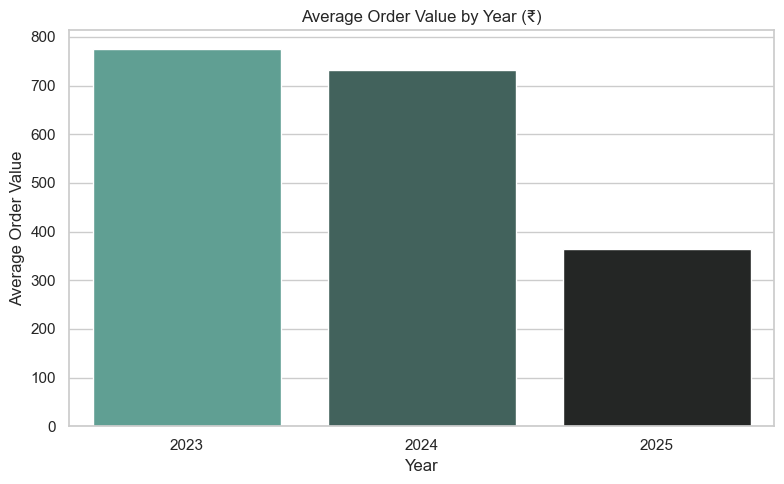

In [14]:
plt.figure(figsize=(8,5))

# Group by Year, calculate total sales and total unique orders separately
total_sales_per_year = df.groupby('Year')['Total Price'].sum()
total_orders_per_year = df.groupby('Year')['Order ID'].nunique()

# Average Order Value calculation
avg_order_value = total_sales_per_year / total_orders_per_year

sns.barplot(
    x=avg_order_value.index.astype(str),
    y=avg_order_value.values,
    palette=sns.color_palette("dark:#5A9_r", len(avg_order_value)),
    hue=avg_order_value.index.astype(str),
    dodge=False,
    legend=False
)

plt.title("Average Order Value by Year (₹)")
plt.xlabel("Year")
plt.ylabel("Average Order Value")
plt.tight_layout()
plt.show()



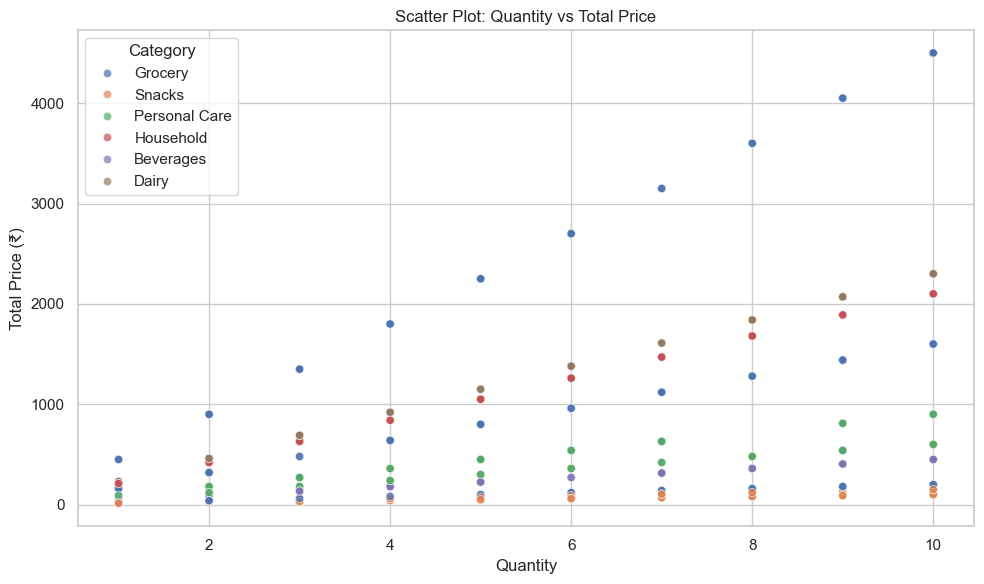

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df.sample(500), x='Quantity', y='Total Price', hue='Category', alpha=0.7)
plt.title("Scatter Plot: Quantity vs Total Price")
plt.xlabel("Quantity")
plt.ylabel("Total Price (₹)")
plt.tight_layout()
plt.show()


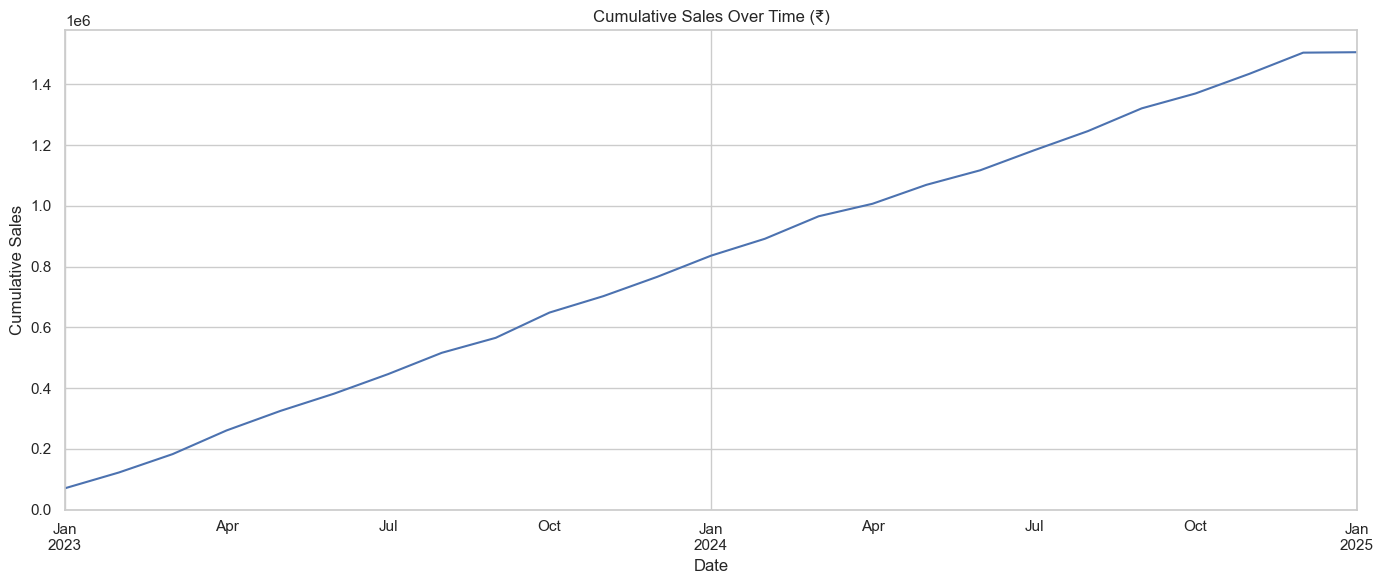

In [17]:
plt.figure(figsize=(14,6))
cumulative_sales = df.groupby(pd.Grouper(key='Date', freq='ME'))['Total Price'].sum().cumsum()
cumulative_sales.plot()
plt.title("Cumulative Sales Over Time (₹)")
plt.xlabel("Date")
plt.ylabel("Cumulative Sales")
plt.tight_layout()
plt.show()


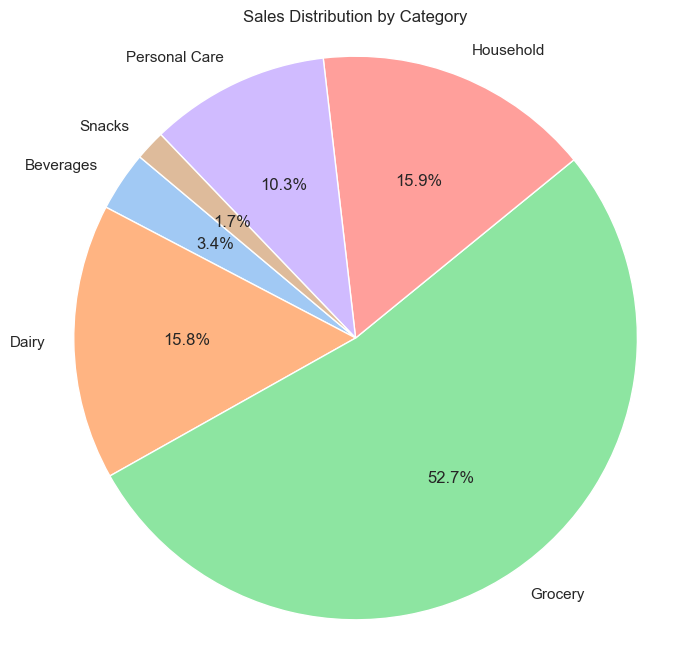

In [18]:
category_sales = df.groupby('Category')['Total Price'].sum()
plt.figure(figsize=(8,8))
plt.pie(
    category_sales,
    labels=category_sales.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel', len(category_sales))
)
plt.title("Sales Distribution by Category")
plt.axis('equal')
plt.show()


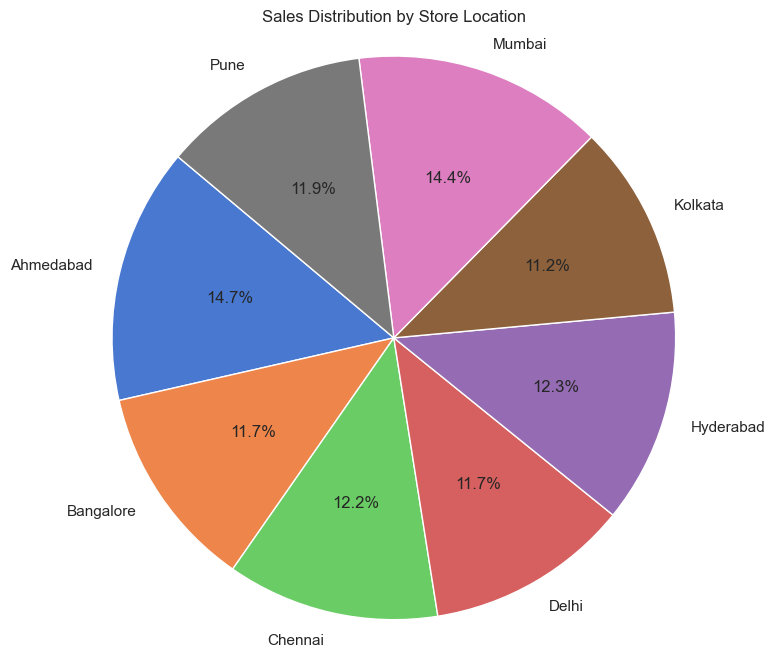

In [19]:
location_sales = df.groupby('Store Location')['Total Price'].sum()
plt.figure(figsize=(8,8))
plt.pie(
    location_sales,
    labels=location_sales.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('muted', len(location_sales))
)
plt.title("Sales Distribution by Store Location")
plt.axis('equal')
plt.show()


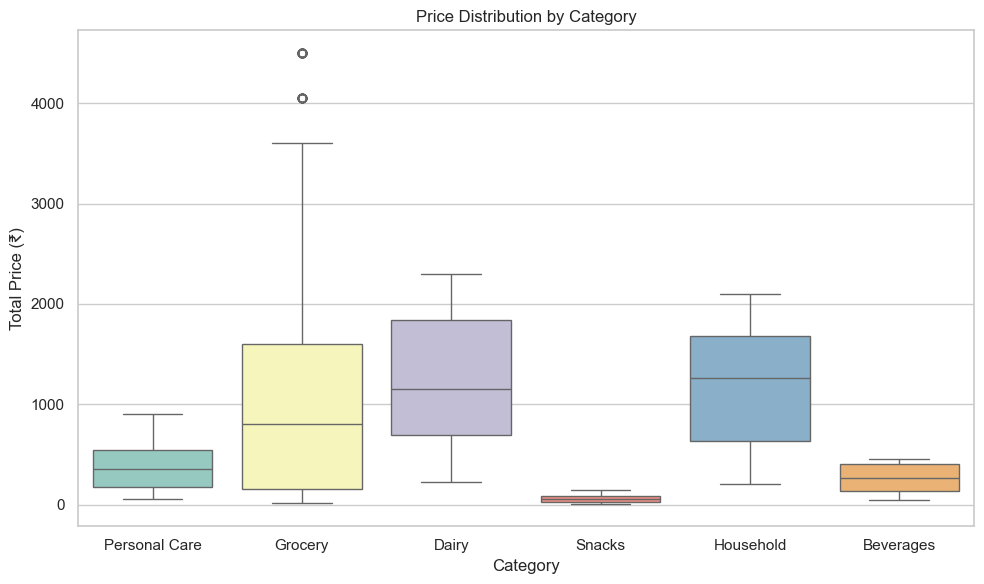

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x='Category', 
    y='Total Price', 
    data=df, 
    palette='Set3', 
    hue='Category',
    dodge=False,
    legend=False
)
plt.title("Price Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Total Price (₹)")
plt.tight_layout()
plt.show()
